In [5]:
import numpy as np
from os import path
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
from matplotlib import pyplot as plt
from astropy.io import ascii
import healpy
import astropy.units as u
import pandas as pd
import matplotlib
from scipy.optimize import curve_fit
from scipy import stats
#from magnification_library import *

In [6]:
matplotlib.rcParams.update({'font.size': 22})

In [7]:
#____________________fit
def sum_chi2(data, error, model, step_low=0, step_high=None, cov=False, verbose=True):
    if step_high==None:
        step_high=len(data)
        
    data = data[step_low:step_high]
    model = model[step_low:step_high]
    if cov==True:
        error = error[step_low:step_high, step_low:step_high]
        y = (data - model).T * np.linalg.inv(error) * (data - model)
    else :
        error = error[step_low:step_high]
        y = (data - model)**2/error**2
    if np.isnan(y).any() and verbose:
        print("Omitted NaN values in chi2")
    return np.nansum(y)



In [12]:
root_path = "../output_data/"

In [13]:
[z_cl, mass_cl, n_halo] = np.load(root_path + "halo_bin_properties.npy", allow_pickle=True)

In [14]:
mass_eval_LBGp = np.load(root_path +"magnification_range_fitted_mass_LBGp_matter200_cM_Diemer15.npy", allow_pickle=True)
mass_eval_LBGpp = np.load(root_path +"magnification_range_fitted_mass_LBGpp_matter200_cM_Diemer15.npy", allow_pickle=True)
mass_eval_Udropp = np.load(root_path +"magnification_range_fitted_mass_Udropp_matter200_cM_Diemer15.npy", allow_pickle=True)

In [15]:
mass_guess = np.logspace(12,16,500, base=10)

In [16]:
mass_LBGp = np.load(root_path +"fitted_mass_LBGp_matter200_cM_Diemer15.npy", allow_pickle=True)
mass_LBGpp = np.load(root_path +"fitted_mass_LBGpp_matter200_cM_Diemer15.npy", allow_pickle=True)
mass_Udropp = np.load(root_path +"fitted_mass_Udropp_matter200_cM_Diemer15.npy", allow_pickle=True)

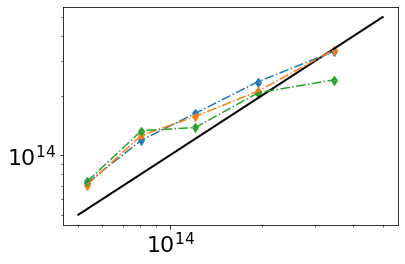

In [79]:
i=4
mass_eval = mass_eval_LBGp

[plt.errorbar(mass_cl[i,:], mass_eval[0,i,:],\
             yerr = (mass_eval[2,i,:]-mass_eval[1,i,:]),lolims=True, uplims=True, fmt='-.', \
              label ="z="+str(round(z_cl[i,0],2))) for mass_eval in [mass_eval_LBGp,mass_eval_LBGpp,  mass_eval_Udropp]]

plt.loglog((5e13, 5e14),(5e13,5e14), color='black', lw=2)

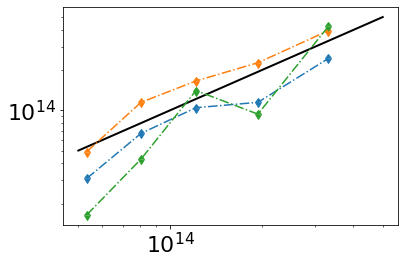

In [18]:
i=3
mass_eval = mass_eval_LBGp

[plt.errorbar(mass_cl[i,:], mass_eval[0,i,:],\
             yerr = (mass_eval[2,i,:]-mass_eval[1,i,:]),lolims=True, uplims=True, fmt='-.')\
               for mass_eval in [mass_LBGp,mass_LBGpp,  mass_Udropp]]

plt.loglog((5e13, 5e14),(5e13,5e14), color='black', lw=2)

-3.3007104653424535 1.122092076197479


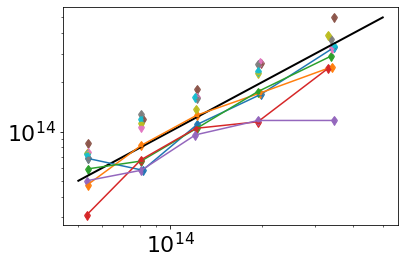

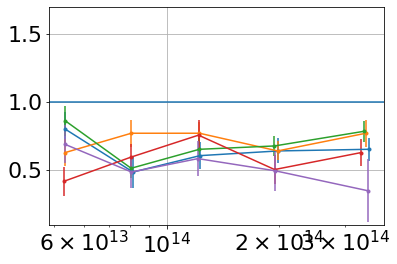

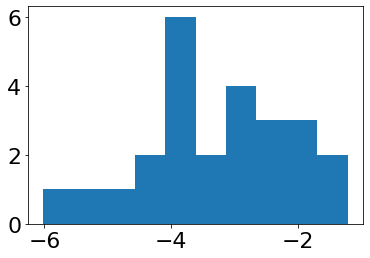

In [19]:
plt.subplots(1)
mass_eval = mass_LBGp 
[plt.errorbar(mass_cl[i,:], mass_eval[0,i,:],\
             yerr = 0.5*(mass_eval[2,i,:]-mass_eval[1,i,:]),lolims=True, uplims=True, fmt='.-', \
              label ="z="+str(round(z_cl[i,0],2))) for i in range(5)]

mass_eval = mass_eval_LBGp

[plt.errorbar(mass_cl[i,:], mass_eval[0,i,:],\
             yerr = 0.5*(mass_eval[2,i,:]-mass_eval[1,i,:]),lolims=True, uplims=True, fmt='.', \
              label ="z="+str(round(z_cl[i,0],2))) for i in range(5)]


plt.loglog((5e13, 5e14),(5e13,5e14), color='black', lw=2)


plt.subplots(1)
[plt.errorbar(mass_cl[i,:], mass_LBGp[0,i,:]/mass_eval_LBGp[0,i,:], yerr= 0.5*(mass_LBGp[2,i,:]-mass_LBGp[1,i,:])/mass_eval_LBGp[0,i,:],fmt='.-' ) for i in range(5)]

plt.axhline(1)
plt.xscale('log')
plt.grid()
plt.ylim(0.1,1.7)

plt.subplots(1)
dat = (mass_LBGp[0,:,:].flatten()-mass_eval_LBGp[0,:,:].flatten())/\
np.sqrt((0.5*(mass_LBGp[2,:,:].flatten()-mass_LBGp[1,:,:].flatten()))**2 + (0.5*(mass_eval_LBGp[2,:,:].flatten()-mass_eval_LBGp[1,:,:].flatten()))**2)

print(dat.mean(), np.std(dat))
                                                                           
plt.hist(dat,bins=10);

In [20]:
Nelem = np.isnan(dat).size - np.sum(np.isnan(dat)) 

t_rand = np.array([(np.mean(np.random.normal(0., 1., Nelem)), np.std(np.random.normal(0, 1., Nelem))) for i in range(1000)])

#perc = 99.73
perc = [68.27, 95.45, 99.73]

for i in perc:
    print(i)
    print(np.percentile(t_rand[:,0],100-i), np.percentile(t_rand[:,0],i))
    print(np.percentile(t_rand[:,1],100-i), np.percentile(t_rand[:,1],i))


    if (np.nanmean(dat)>np.percentile(t_rand[:,0],100-i)) & (np.nanmean(dat)<np.percentile(t_rand[:,0],i)) :
        print("Mean compatible with normal distrib at "+str(i)+"%")
    else:
        print("Mean not compatible with normal distrib at "+str(i)+"%")

    if (np.nanstd(dat)>np.percentile(t_rand[:,1],100-i)) & (np.nanstd(dat)<np.percentile(t_rand[:,1],i)) :
        print("Std compatible with normal distrib at "+str(i)+"%")
    else:
        print("Std not compatible with normal distrib at "+str(i)+"%")

68.27
-0.09577436127986581 0.10201478734671203
0.904015937608509 1.0360553792500857
Mean not compatible with normal distrib at 68.27%
Std not compatible with normal distrib at 68.27%
95.45
-0.34448128180747184 0.34208494736577977
0.7397617567277829 1.2201576909869953
Mean not compatible with normal distrib at 95.45%
Std compatible with normal distrib at 95.45%
99.73
-0.4934472666238401 0.5926983539060737
0.6277478414441537 1.3388594320442002
Mean not compatible with normal distrib at 99.73%
Std compatible with normal distrib at 99.73%


0.18579627563942708 1.5033733862158742


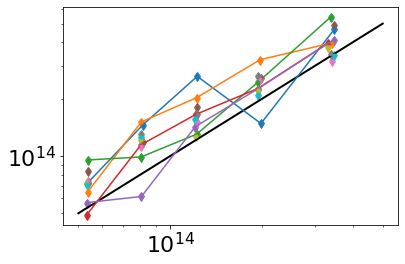

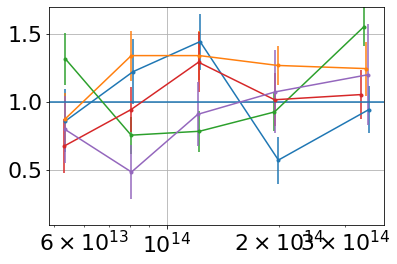

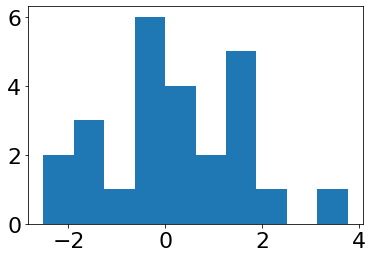

In [21]:
k = 19


plt.subplots(1)
mass_eval = mass_LBGpp 
[plt.errorbar(mass_cl[i,:], mass_eval[0,i,:],\
             yerr = 0.5*(mass_eval[2,i,:]-mass_eval[1,i,:]),lolims=True, uplims=True, fmt='.-', \
              label ="z="+str(round(z_cl[i,0],2))) for i in range(5)]

mass_eval = mass_eval_LBGpp

[plt.errorbar(mass_cl[i,:], mass_eval[0,i,:],\
             yerr = 0.5*(mass_eval[2,i,:]-mass_eval[1,i,:]),lolims=True, uplims=True, fmt='.', \
              label ="z="+str(round(z_cl[i,0],2))) for i in range(5)]


plt.loglog((5e13, 5e14),(5e13,5e14), color='black', lw=2)


plt.subplots(1)
[plt.errorbar(mass_cl[i,:], mass_LBGpp[0,i,:]/mass_eval_LBGpp[0,i,:], yerr= 0.5*(mass_LBGpp[2,i,:]-mass_LBGpp[1,i,:])/mass_eval_LBGpp[0,i,:],fmt='.-' ) for i in range(5)]

plt.axhline(1)
plt.xscale('log')
plt.grid()
plt.ylim(0.1,1.7)

plt.subplots(1)
dat = (mass_LBGpp[0,:,:].flatten()-mass_eval_LBGpp[0,:,:].flatten())/\
np.sqrt((0.5*(mass_LBGpp[2,:,:].flatten()-mass_LBGpp[1,:,:].flatten()))**2 + (0.5*(mass_eval_LBGpp[2,:,:].flatten()-mass_eval_LBGpp[1,:,:].flatten()))**2)

print(dat.mean(), np.std(dat))
                                                                           
plt.hist(dat,bins=10);

In [22]:
Nelem = np.isnan(dat).size - np.sum(np.isnan(dat)) 

t_rand = np.array([(np.mean(np.random.normal(0., 1., Nelem)), np.std(np.random.normal(0, 1., Nelem))) for i in range(1000)])

#perc = 99.73
perc = [68.27, 95.45, 99.73]

for i in perc:
    print(i)
    print(np.percentile(t_rand[:,0],100-i), np.percentile(t_rand[:,0],i))
    print(np.percentile(t_rand[:,1],100-i), np.percentile(t_rand[:,1],i))


    if (np.nanmean(dat)>np.percentile(t_rand[:,0],100-i)) & (np.nanmean(dat)<np.percentile(t_rand[:,0],i)) :
        print("Mean compatible with normal distrib at "+str(i)+"%")
    else:
        print("Mean not compatible with normal distrib at "+str(i)+"%")

    if (np.nanstd(dat)>np.percentile(t_rand[:,1],100-i)) & (np.nanstd(dat)<np.percentile(t_rand[:,1],i)) :
        print("Std compatible with normal distrib at "+str(i)+"%")
    else:
        print("Std not compatible with normal distrib at "+str(i)+"%")

68.27
-0.10074023840339494 0.10329138404807096
0.8927687303901267 1.0306250189412314
Mean not compatible with normal distrib at 68.27%
Std not compatible with normal distrib at 68.27%
95.45
-0.33515212472349254 0.32426792426527334
0.7247606753952054 1.2146151471227484
Mean compatible with normal distrib at 95.45%
Std not compatible with normal distrib at 95.45%
99.73
-0.5123663869535028 0.5809341252408081
0.6001313721041353 1.343972428700388
Mean compatible with normal distrib at 99.73%
Std not compatible with normal distrib at 99.73%


-0.9703820539434019 1.3658579032980456


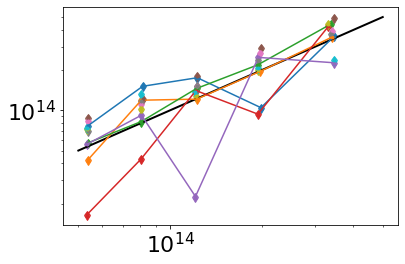

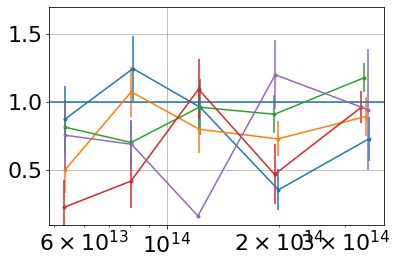

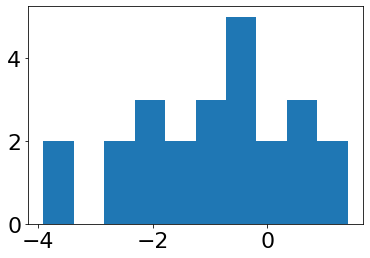

In [23]:
plt.subplots(1)
mass_eval = mass_Udropp
[plt.errorbar(mass_cl[i,:], mass_eval[0,i,:],\
             yerr = 0.5*(mass_eval[2,i,:]-mass_eval[1,i,:]),lolims=True, uplims=True, fmt='.-', \
              label ="z="+str(round(z_cl[i,0],2))) for i in range(5)]

mass_eval = mass_eval_Udropp

[plt.errorbar(mass_cl[i,:], mass_eval[0,i,:],\
             yerr = 0.5*(mass_eval[2,i,:]-mass_eval[1,i,:]),lolims=True, uplims=True, fmt='.', \
              label ="z="+str(round(z_cl[i,0],2))) for i in range(5)]


plt.loglog((5e13, 5e14),(5e13,5e14), color='black', lw=2)


plt.subplots(1)
[plt.errorbar(mass_cl[i,:], mass_Udropp[0,i,:]/mass_eval_Udropp[0,i,:], yerr= 0.5*(mass_Udropp[2,i,:]-mass_Udropp[1,i,:])/mass_eval_Udropp[0,i,:],fmt='.-' ) for i in range(5)]

plt.axhline(1)
plt.xscale('log')
plt.grid()
plt.ylim(0.1,1.7)


plt.subplots(1)
dat = (mass_Udropp[0,:,:].flatten()-mass_eval_Udropp[0,:,:].flatten())/\
np.sqrt((0.5*(mass_Udropp[2,:,:].flatten()-mass_Udropp[1,:,:].flatten()))**2 + (0.5*(mass_eval_Udropp[2,:,:].flatten()-mass_eval_Udropp[1,:,:].flatten()))**2)

print(np.nanmean(dat), np.nanstd(dat))
                                                                           
plt.hist(dat,bins=10);

In [25]:
Nelem = np.isnan(dat).size - np.sum(np.isnan(dat)) 

t_rand = np.array([(np.mean(np.random.normal(0., 1., Nelem)), np.std(np.random.normal(0, 1., Nelem))) for i in range(1000)])

#perc = 99.73
perc = [68.27, 95.45, 99.73]

for i in perc:
    print(i)
    print(np.percentile(t_rand[:,0],100-i), np.percentile(t_rand[:,0],i))
    print(np.percentile(t_rand[:,1],100-i), np.percentile(t_rand[:,1],i))


    if (np.nanmean(dat)>np.percentile(t_rand[:,0],100-i)) & (np.nanmean(dat)<np.percentile(t_rand[:,0],i)) :
        print("Mean compatible with normal distrib at "+str(i)+"%")
    else:
        print("Mean not compatible with normal distrib at "+str(i)+"%")

    if (np.nanstd(dat)>np.percentile(t_rand[:,1],100-i)) & (np.nanstd(dat)<np.percentile(t_rand[:,1],i)) :
        print("Std compatible with normal distrib at "+str(i)+"%")
    else:
        print("Std not compatible with normal distrib at "+str(i)+"%")

68.27
-0.10385475389630887 0.0960104261866612
0.8952557374616619 1.0392597063339373
Mean not compatible with normal distrib at 68.27%
Std not compatible with normal distrib at 68.27%
95.45
-0.32766176547187703 0.3371158964005181
0.7216323126683863 1.203341701947867
Mean not compatible with normal distrib at 95.45%
Std not compatible with normal distrib at 95.45%
99.73
-0.5466939822715442 0.5480265963888109
0.6028533542815924 1.3554442730664111
Mean not compatible with normal distrib at 99.73%
Std not compatible with normal distrib at 99.73%


## Fit relation 

### $ <ln(Y|Mfof)> = ln(A) + B \times ln(\frac{Mfof}{Mpiv}) + C \times ln(\frac{1+z}{1+zp})  $

In [26]:
from scipy.optimize import curve_fit


In [27]:
def mass_relation(x_dat, a, b, c):
    mpiv = 0.86 * 1e14
    zpiv = 0.73
    x,y = x_dat
    rel = np.log(a) + b * np.log(x/mpiv) + c * np.log((1+y)/(1+zpiv))
    return rel.flatten()

In [28]:
x = [mass_cl,z_cl]

In [29]:
fake_data =  mass_relation(x, 0.5,1.7,-0.2) + np.random.random(25)

In [30]:
popt, pcov = curve_fit(mass_relation, x, fake_data)

In [31]:
popt, np.sqrt(np.diag(pcov)), pcov

(array([ 0.70652093,  1.89414574, -0.47635884]),
 array([0.03744539, 0.06858071, 0.27122088]),
 array([[ 0.00140216, -0.0013305 ,  0.00148093],
        [-0.0013305 ,  0.00470331,  0.00034114],
        [ 0.00148093,  0.00034114,  0.07356076]]))

In [32]:
popt_eval_LBGp, pcov_eval_LBGp = curve_fit(mass_relation,x, np.log(mass_eval_LBGp[0,:,:].flatten()), sigma = (0.5*(mass_eval_LBGp[2,:,:]-mass_eval_LBGp[1,:,:]).flatten())/(np.log(np.exp(1))*mass_eval_LBGp[0,:,:].flatten()), absolute_sigma=True)

In [33]:
popt_eval_LBGp, pcov_eval_LBGp, np.sqrt(np.diag(pcov_eval_LBGp))

(array([ 1.16672958e+14,  8.89064429e-01, -2.99148848e-01]),
 array([[ 1.07508519e+24, -4.82767920e+09,  1.64055006e+10],
        [-4.82767920e+09,  1.62419874e-04,  8.02001842e-05],
        [ 1.64055006e+10,  8.02001842e-05,  2.67581711e-03]]),
 array([1.03686315e+12, 1.27444056e-02, 5.17283008e-02]))

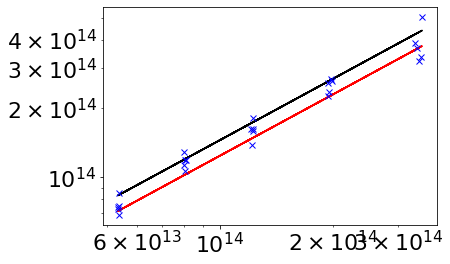

In [34]:
plt.loglog(mass_cl.flatten(), np.exp(mass_relation([mass_cl,0.3], *popt_eval_LBGp)),'k')
plt.loglog(mass_cl.flatten(), np.exp(mass_relation([mass_cl,1.2], *popt_eval_LBGp)),'r')

plt.loglog(mass_cl.flatten(), mass_eval_LBGp[0,:,:].flatten(),'bx')

In [35]:
popt_LBGp, pcov_LBGp = curve_fit(mass_relation,x, np.log(mass_LBGp[0,:,:].flatten()), sigma = (0.5*(mass_LBGp[2,:,:]-mass_LBGp[1,:,:]).flatten())/(np.log(np.exp(1))*mass_LBGp[0,:,:].flatten()), absolute_sigma=True)

In [36]:
popt_LBGp, pcov_LBGp, np.sqrt(np.diag(pcov_LBGp))

(array([ 7.66613579e+13,  8.93448768e-01, -5.49320592e-01]),
 array([[ 9.31345440e+24, -7.64816958e+10,  2.15974708e+11],
        [-7.64816958e+10,  2.14857356e-03,  1.27347978e-03],
        [ 2.15974708e+11,  1.27347978e-03,  4.90428882e-02]]),
 array([3.05179528e+12, 4.63527083e-02, 2.21456290e-01]))

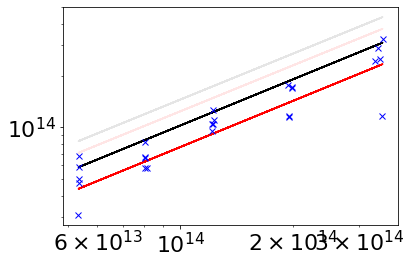

In [37]:
plt.loglog(mass_cl.flatten(), np.exp(mass_relation([mass_cl,0.3], *popt_LBGp)),'k')
plt.loglog(mass_cl.flatten(), np.exp(mass_relation([mass_cl,1.2], *popt_LBGp)),'r')

plt.loglog(mass_cl.flatten(), np.exp(mass_relation([mass_cl,0.3], *popt_eval_LBGp)),'k', alpha=0.1)
plt.loglog(mass_cl.flatten(), np.exp(mass_relation([mass_cl,1.2], *popt_eval_LBGp)),'r',alpha=0.1)


plt.loglog(mass_cl.flatten(), mass_LBGp[0,:,:].flatten(),'bx')

### $ <ln(Y|Mfof)> = A + B \times ln(\frac{Mfof}{Mpiv}) + C \times ln(\frac{1+z}{1+zp})  $

In [38]:
import emcee
import corner
from multiprocessing import Pool, cpu_count

In [39]:
def mass_relation(x_dat, a, b, c):
    mpiv = 0.86 * 1e14
    zpiv = 0.73
    x,y = x_dat
    rel = a + b * np.log(x/mpiv) + c * np.log((1+y)/(1+zpiv))
    return rel.flatten()

In [40]:
#----- Defines log likelihood
def ln_likelihood(params, pdata_x, pdata_y):
    data_x = pdata_x
    data_y = pdata_y[0]
    error_y = pdata_y[1]
    
    model = mass_relation(data_x, *params)
    
    ln_like = -0.5 * sum_chi2(data_y, error_y, model, step_low=0, step_high=None, cov=False, verbose=False)
        
    return ln_like

In [41]:
#----- Defines log priors
def ln_priors(params):
    #--- Priors
    cond1 = params[0]>=0  and params[0]<=np.inf
    cond2 = params[1]>=-np.inf  and params[1]<=np.inf 
    cond3 = params[2]>=-np.inf  and params[2]<=np.inf 
    if cond1 and cond2 and cond3:
        return 0
    else:
        return -np.inf

In [42]:
#----- Defines log proba
def ln_proba(params, pdatax, pdatay):
    return ln_likelihood(params, pdatax, pdatay) + ln_priors(params)

In [43]:
#----- Define the MCMC
par0 = np.array([np.log(1e14), 1.0, -0.5])

param_name = ['A', 'B', 'C']
ndim, nwalkers, nsteps = len(par0), 10, 5000
burnin = int(0.2*nsteps)
pos = [par0 + par0*0.2*np.random.randn(ndim) for i in range(nwalkers)]


In [44]:
def to_log(data, error, base=np.exp(1)):
    if base==np.exp(1):
        log_func = np.log
        
    log_data = log_func(data)
    log_error = error / (log_func(base) * data)
    return log_data, log_error

# Plot the mass relation from magnification profile

In [45]:
#----- Define the MCMC
pdata_x = x
pdata_y_eval_LBGp   = to_log(mass_eval_LBGp[0,:,:].flatten(), (0.5*(mass_eval_LBGp[2,:,:]-mass_eval_LBGp[1,:,:]).flatten()))
pdata_y_eval_LBGpp  = to_log(mass_eval_LBGpp[0,:,:].flatten(), (0.5*(mass_eval_LBGpp[2,:,:]-mass_eval_LBGpp[1,:,:]).flatten()))
pdata_y_eval_Udropp = to_log(mass_eval_Udropp[0,:,:].flatten(), (0.5*(mass_eval_Udropp[2,:,:]-mass_eval_Udropp[1,:,:]).flatten()))

sampler_eval_LBGp = emcee.EnsembleSampler(nwalkers, ndim, ln_proba,     
                                args=[pdata_x, pdata_y_eval_LBGp])#, pool=Pool(cpu_count()))

sampler_eval_LBGpp = emcee.EnsembleSampler(nwalkers, ndim, ln_proba,     
                                args=[pdata_x, pdata_y_eval_LBGpp])#, pool=Pool(cpu_count()))

sampler_eval_Udropp = emcee.EnsembleSampler(nwalkers, ndim, ln_proba,     
                                args=[pdata_x, pdata_y_eval_Udropp])#, pool=Pool(cpu_count()))

In [46]:
#----- Run the MCMC
res_eval_LBGp = sampler_eval_LBGp.run_mcmc(pos, nsteps, progress=True)
res_eval_LBGpp = sampler_eval_LBGpp.run_mcmc(pos, nsteps, progress=True)
res_eval_Udropp = sampler_eval_Udropp.run_mcmc(pos, nsteps, progress=True)

100%|██████████| 5000/5000 [00:10<00:00, 494.56it/s]


In [47]:
#----- Burn in
param_chains_eval_LBGp, lnL_chains_eval_LBGp = sampler_eval_LBGp.chain[:, burnin:, :], sampler_eval_LBGp.lnprobability[:, burnin:]
param_chains_eval_LBGpp, lnL_chains_eval_LBGpp = sampler_eval_LBGpp.chain[:, burnin:, :], sampler_eval_LBGpp.lnprobability[:, burnin:]
param_chains_eval_Udropp, lnL_chains_eval_Udropp = sampler_eval_Udropp.chain[:, burnin:, :], sampler_eval_Udropp.lnprobability[:, burnin:]

In [48]:
#----- Get the best fit parameters
param_best_eval_LBGp = [param_chains_eval_LBGp[:,:,i].flatten()[np.argmax(lnL_chains_eval_LBGp)] for i in range(ndim)]
param_best_eval_LBGpp = [param_chains_eval_LBGpp[:,:,i].flatten()[np.argmax(lnL_chains_eval_LBGpp)] for i in range(ndim)]
param_best_eval_Udropp = [param_chains_eval_Udropp[:,:,i].flatten()[np.argmax(lnL_chains_eval_Udropp)] for i in range(ndim)]

In [49]:
print (param_best_eval_LBGp)
print (param_best_eval_LBGpp)
print (param_best_eval_Udropp)

#popt_eval_LBGpp, pcov_eval_LBGpp, np.sqrt(np.diag(pcov_eval_LBGpp))

[32.39052910989731, 0.8890722150255619, -0.29905687324291275]
[32.395762719228955, 0.8609499816526665, -0.2804796147861996]
[32.33269719229107, 0.7185832472658366, -1.1602382083451273]


In [ ]:
#----- Parameter space
par_flat_eval_LBGp   = param_chains_eval_LBGp.reshape(param_chains_eval_LBGp.shape[0]*param_chains_eval_LBGp.shape[1], param_chains_eval_LBGp.shape[2])
par_flat_eval_LBGpp  = param_chains_eval_LBGpp.reshape(param_chains_eval_LBGpp.shape[0]*param_chains_eval_LBGpp.shape[1], param_chains_eval_LBGpp.shape[2])
par_flat_eval_Udropp = param_chains_eval_Udropp.reshape(param_chains_eval_Udropp.shape[0]*param_chains_eval_Udropp.shape[1], param_chains_eval_Udropp.shape[2])

fig = corner.corner(par_flat_eval_LBGp, bins=50, color='k', smooth=0, labels=param_name, quantiles=(0.16, 0.84))
fig = corner.corner(par_flat_eval_LBGpp, bins=50, color='k', smooth=0, labels=param_name, quantiles=(0.16, 0.84))
fig = corner.corner(par_flat_eval_Udropp, bins=50, color='k', smooth=0, labels=param_name, quantiles=(0.16, 0.84))
#fig.savefig(cluster.output_dir+'/Hadronic_triangle_corner.pdf')

# Plot the mass relation from cross-correlations functions

In [51]:
#----- Define the MCMC
pdata_x = x
pdata_y_LBGp   = to_log(mass_LBGp[0,:,:].flatten(), (0.5*(mass_LBGp[2,:,:]-mass_LBGp[1,:,:]).flatten()))
pdata_y_LBGpp  = to_log(mass_LBGpp[0,:,:].flatten(), (0.5*(mass_LBGpp[2,:,:]-mass_LBGpp[1,:,:]).flatten()))
pdata_y_Udropp = to_log(mass_Udropp[0,:,:].flatten(), (0.5*(mass_Udropp[2,:,:]-mass_Udropp[1,:,:]).flatten()))

sampler_LBGp = emcee.EnsembleSampler(nwalkers, ndim, ln_proba,     
                                args=[pdata_x, pdata_y_LBGp])#, pool=Pool(cpu_count()))

sampler_LBGpp = emcee.EnsembleSampler(nwalkers, ndim, ln_proba,     
                                args=[pdata_x, pdata_y_LBGpp])#, pool=Pool(cpu_count()))

sampler_Udropp = emcee.EnsembleSampler(nwalkers, ndim, ln_proba,     
                                args=[pdata_x, pdata_y_Udropp])#, pool=Pool(cpu_count()))

In [52]:
#----- Run the MCMC
res_LBGp = sampler_LBGp.run_mcmc(pos, nsteps, progress=True)
res_LBGpp = sampler_LBGpp.run_mcmc(pos, nsteps, progress=True)
res_Udropp = sampler_Udropp.run_mcmc(pos, nsteps, progress=True)

100%|██████████| 5000/5000 [00:09<00:00, 510.64it/s]


In [53]:
#----- Burn in
param_chains_LBGp, lnL_chains_LBGp = sampler_LBGp.chain[:, burnin:, :], sampler_LBGp.lnprobability[:, burnin:]
param_chains_LBGpp, lnL_chains_LBGpp = sampler_LBGpp.chain[:, burnin:, :], sampler_LBGpp.lnprobability[:, burnin:]
param_chains_Udropp, lnL_chains_Udropp = sampler_Udropp.chain[:, burnin:, :], sampler_Udropp.lnprobability[:, burnin:]

In [54]:
#----- Get the best fit parameters
param_best_LBGp = [param_chains_LBGp[:,:,i].flatten()[np.argmax(lnL_chains_LBGp)] for i in range(ndim)]
param_best_LBGpp = [param_chains_LBGpp[:,:,i].flatten()[np.argmax(lnL_chains_LBGpp)] for i in range(ndim)]
param_best_Udropp = [param_chains_Udropp[:,:,i].flatten()[np.argmax(lnL_chains_Udropp)] for i in range(ndim)]

In [55]:
print (param_best_LBGp)
print (param_best_LBGpp)
print (param_best_Udropp)

#popt_eval_LBGpp, pcov_eval_LBGpp, np.sqrt(np.diag(pcov_eval_LBGpp))

[31.96876000253474, 0.8946986012280209, -0.5546390780942834]
[32.430953063282765, 0.9608816759403129, -0.7605511369812128]
[32.23777558852966, 1.0088457714359993, -0.26088866088413953]


In [ ]:
#----- Parameter space
par_flat_LBGp = param_chains_LBGp.reshape(param_chains_LBGp.shape[0]*param_chains_LBGp.shape[1], param_chains_LBGp.shape[2])
par_flat_LBGpp = param_chains_LBGpp.reshape(param_chains_LBGpp.shape[0]*param_chains_LBGpp.shape[1], param_chains_LBGpp.shape[2])
par_flat_Udropp = param_chains_Udropp.reshape(param_chains_Udropp.shape[0]*param_chains_Udropp.shape[1], param_chains_Udropp.shape[2])

fig = corner.corner(par_flat_LBGp, bins=50, color='k', smooth=0, labels=param_name, quantiles=(0.16, 0.84))
fig = corner.corner(par_flat_LBGpp, bins=50, color='k', smooth=0, labels=param_name, quantiles=(0.16, 0.84))
fig = corner.corner(par_flat_Udropp, bins=50, color='k', smooth=0, labels=param_name, quantiles=(0.16, 0.84))
#fig.savefig(cluster.output_dir+'/Hadronic_triangle_corner.pdf')

In [57]:
import pygtc

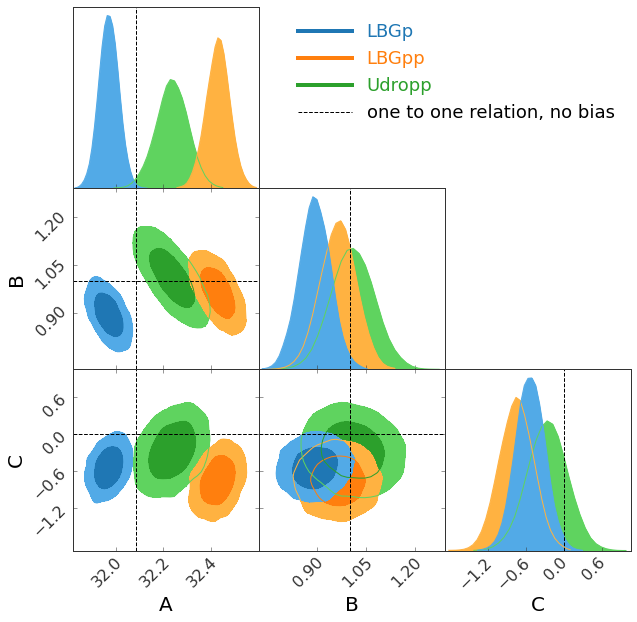

In [77]:
# List of parameter names, supports latex
# NOTE: For capital greek letters in latex mode, use \mathsf{}
names = param_name

# Labels for the different chains
chainLabels = ["LBGp", "LBGpp", "Udropp"]#, "LBGp_eval", "LBGpp_eval", "Udropp_eval"]

# List of Gaussian curves to plot
#(to represent priors): mean, width
# Empty () or None if no prior to plot
priors = (None, None, None)

# List of truth values, to mark best-fit or input values
# NOT a python array because of different lengths
# Here we choose two sets of truth values
truths = ([np.log(0.86 * 1e14), 1, 0])#, param_best_LBGp, param_best_LBGpp)

# Labels for the different truths
truthLabels = ('one to one relation, no bias')#,'Best fit LBGp', 'Best fit LBGpp')

#par_flat_LBGp,par_flat_LBGpp, par_flat_Udropp],#, 

fig = pygtc.plotGTC(chains=[par_flat_LBGp,par_flat_LBGpp, par_flat_Udropp],
                    paramNames=names,
                    #paramRanges =[(32,32.5),(0.6,1.1),(-1.5,0.1)],
                    chainLabels=chainLabels,
                    truths=truths,
                    truthLabels=truthLabels,
                    priors=priors,
                    figureSize= 10, 
                    customLabelFont = {'family':'DejaVu Sans', 'size':20}, 
                    customLegendFont = {'family':'DejaVu Sans', 'size':18}, 
                    customTickFont = {'family':'DejaVu Sans', 'size':16}, 
                    truthLineStyles = ['--'],
                    truthColors = ['black'],
                    smoothingKernel = 1,
                    plotDensity = False,
                    legendMarker = "All",
                    filledPlots = [True])


In [ ]:
# List of parameter names, supports latex
# NOTE: For capital greek letters in latex mode, use \mathsf{}
names = param_name

# Labels for the different chains
chainLabels = ["LBGp", "LBGpp", "Udropp"]#, "LBGp_eval", "LBGpp_eval", "Udropp_eval"]

# List of Gaussian curves to plot
#(to represent priors): mean, width
# Empty () or None if no prior to plot
priors = (None, None, None)

# List of truth values, to mark best-fit or input values
# NOT a python array because of different lengths
# Here we choose two sets of truth values
truths = ([np.log(0.86 * 1e14), 1, 0])#, param_best_LBGp, param_best_LBGpp)

# Labels for the different truths
truthLabels = ('one to one relation, no bias')#,'Best fit LBGp', 'Best fit LBGpp')

#par_flat_LBGp,par_flat_LBGpp, par_flat_Udropp],#, 

fig = pygtc.plotGTC(chains=[par_flat_eval_LBGp, par_flat_eval_LBGpp, par_flat_eval_Udropp],
                    paramNames=names,
                    paramRanges =[(32,32.5),(0.6,1.1),(-1.5,0.1)],
                    chainLabels=chainLabels,
                    truths=truths,
                    truthLabels=truthLabels,
                    priors=priors,
                    figureSize= 10, 
                    truthLineStyles = ['-'],
                    truthColors = ['black'],
                    smoothingKernel = 1,
                    plotDensity = False,
                    filledPlots = [True],
                    customTickFont= {'family':'Arial', 'size':9})


### $ <ln(Y|Mfof)> = A + B \times ln(\frac{Mfof}{Mpiv}) + C \times ln(\frac{1+z}{1+zp})  $

### if Y = Mfof ; $ <ln(Y|Mfof)> = A + 1 \times ln(\frac{Mfof}{Mpiv}) + 0 \times ln(\frac{1+z}{1+zp})  $

Text(0, 0.5, '$M_{200,m}$ fitted')

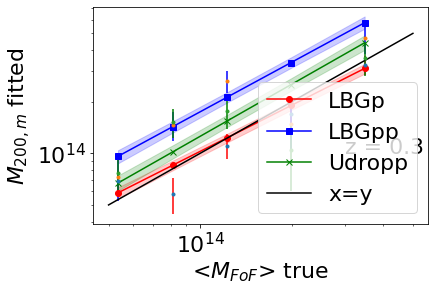

In [60]:
z_fixed = 0.3

relation_LBGp = np.vstack([np.exp(mass_relation([mass_cl[0,:],z_fixed], *par_flat_LBGp[i,:])) for i in range(par_flat_LBGp.shape[0])])
relation_LBGpp = np.vstack([np.exp(mass_relation([mass_cl[0,:],z_fixed], *par_flat_LBGpp[i,:])) for i in range(par_flat_LBGpp.shape[0])])
relation_Udropp = np.vstack([np.exp(mass_relation([mass_cl[0,:],z_fixed], *par_flat_Udropp[i,:])) for i in range(par_flat_Udropp.shape[0])])


plt.loglog(mass_cl[0,:].flatten(), np.exp(mass_relation([mass_cl[0,:],z_fixed], *param_best_LBGp)), 'ro-', label = 'LBGp')
plt.fill_between(mass_cl[0,:].flatten(), np.percentile(relation_LBGp, 16, axis=0), np.percentile(relation_LBGp, 84, axis=0), color='red', alpha=0.2)

plt.loglog(mass_cl[0,:].flatten(), np.exp(mass_relation([mass_cl[0,:],z_fixed], *param_best_LBGpp)), 'bs-', label = 'LBGpp')
plt.fill_between(mass_cl[0,:].flatten(), np.percentile(relation_LBGpp, 16, axis=0), np.percentile(relation_LBGpp, 84, axis=0), color='blue', alpha=0.2)

plt.loglog(mass_cl[0,:].flatten(), np.exp(mass_relation([mass_cl[0,:],z_fixed], *param_best_Udropp)), 'gx-', label = 'Udropp')
plt.fill_between(mass_cl[0,:].flatten(), np.percentile(relation_Udropp, 16, axis=0), np.percentile(relation_Udropp, 84, axis=0), color='green', alpha=0.2)

plt.plot((5e13,5e14),(5e13,5e14),'k',label='x=y')
plt.legend()

[plt.errorbar(mass_cl[0,:], mass_eval[0,0,:],\
             yerr = 0.5*(mass_eval[2,0,:]-mass_eval[1,0,:]),  fmt='.', ecolor=k)\
               for (mass_eval,k) in zip([mass_LBGp, mass_LBGpp,  mass_Udropp],  ['red','blue','green'])];

plt.text(3e14, 1e14, 'z = '+str(z_fixed))
plt.xlabel('<$M_{FoF}$> true')
plt.ylabel('$M_{200,m}$ fitted')

Text(0, 0.5, '$M_{200,m}$ fitted')

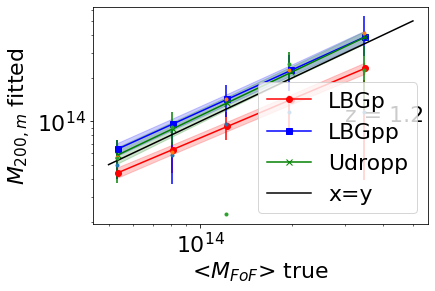

In [61]:
z_fixed = 1.2

relation_LBGp = np.vstack([np.exp(mass_relation([mass_cl[0,:],z_fixed], *par_flat_LBGp[i,:])) for i in range(par_flat_LBGp.shape[0])])
relation_LBGpp = np.vstack([np.exp(mass_relation([mass_cl[0,:],z_fixed], *par_flat_LBGpp[i,:])) for i in range(par_flat_LBGpp.shape[0])])
relation_Udropp = np.vstack([np.exp(mass_relation([mass_cl[0,:],z_fixed], *par_flat_Udropp[i,:])) for i in range(par_flat_Udropp.shape[0])])


plt.loglog(mass_cl[0,:].flatten(), np.exp(mass_relation([mass_cl[0,:],z_fixed], *param_best_LBGp)), 'ro-', label = 'LBGp')
plt.fill_between(mass_cl[0,:].flatten(), np.percentile(relation_LBGp, 16, axis=0), np.percentile(relation_LBGp, 84, axis=0), color='red', alpha=0.2)

plt.loglog(mass_cl[0,:].flatten(), np.exp(mass_relation([mass_cl[0,:],z_fixed], *param_best_LBGpp)), 'bs-', label = 'LBGpp')
plt.fill_between(mass_cl[0,:].flatten(), np.percentile(relation_LBGpp, 16, axis=0), np.percentile(relation_LBGpp, 84, axis=0), color='blue', alpha=0.2)

plt.loglog(mass_cl[0,:].flatten(), np.exp(mass_relation([mass_cl[0,:],z_fixed], *param_best_Udropp)), 'gx-', label = 'Udropp')
plt.fill_between(mass_cl[0,:].flatten(), np.percentile(relation_Udropp, 16, axis=0), np.percentile(relation_Udropp, 84, axis=0), color='green', alpha=0.2)

plt.plot((5e13,5e14),(5e13,5e14),'k',label='x=y')
plt.legend()


[plt.errorbar(mass_cl[-1,:], mass_eval[0,-1,:],\
             yerr = 0.5*(mass_eval[2,-1,:]-mass_eval[1,-1,:]),  fmt='.', ecolor=k)\
               for (mass_eval,k) in zip([mass_LBGp, mass_LBGpp,  mass_Udropp],  ['red','blue','green'])];

plt.text(3e14, 1e14, 'z = '+str(z_fixed))
plt.xlabel('<$M_{FoF}$> true')
plt.ylabel('$M_{200,m}$ fitted')